$$L=0.5m,\Delta t=10^{-4}s,\rho=1.5 \times 10^{-2}kg/m,T=150N,c=?$$

$$\frac{\partial ^2 y(x,t)}{\partial x^2}=\frac{1}{c^2} \frac{\partial ^2 y(x,t)}{\partial t^2}$$

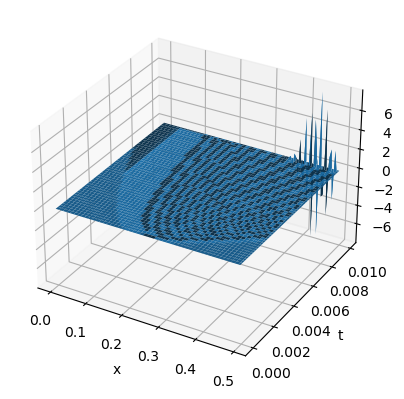

"\nx = np.linspace(0, L, N)\nt = np.arange(0, dt*500, dt)\n\nX, T = np.meshgrid(x, t)\n\nfig = go.Figure(data=[go.Surface(x=X, y=T, z=U)])\nfig.update_layout(title='U(x,t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='U'))\nfig.show()\n"

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

rho = 0.015
T = 150
c = np.sqrt(T/rho)
L = 0.5
N = 100
dt = 10**(-4)
h = 0.05
dx = L/N
cp = dx/dt
counter = 0
tor = 1e-13

U = np.zeros((N,N),float)
for i in range(0,N-1):
    U[i,0] = 0.05/np.sqrt(2*np.pi*rho)*np.exp(-(L/N*i-L/2)**2/(2*rho**2))
    U[i,1] = U[i,0]

U[1,:] = U[1,1]
U[-1,:] = U[-1,1]


for i in range(1,N-2):
    for j in range(1,N-2):
        U[i,j+1] = 2*U[i,j]-U[i,j-1]+((c/cp)**2)*(U[i+1,j]+U[i-1,j]-2*U[i,j])
    
'''

print(U)
#'''
X, T = np.meshgrid(np.arange(N)*dx, np.arange(N)*dt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U.T)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')
plt.show()
'''
x = np.linspace(0, L, N)
t = np.arange(0, dt*500, dt)

X, T = np.meshgrid(x, t)

fig = go.Figure(data=[go.Surface(x=X, y=T, z=U)])
fig.update_layout(title='U(x,t)', scene=dict(xaxis_title='x', yaxis_title='t', zaxis_title='U'))
fig.show()
'''